## Лабораторная работа 8
#### Выполнил: Граур Арсений `5130901/10203`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ThinkDSP.code.thinkdsp import decorate

### Упражнение 1

Преобразование Фурье Гауссовой кривой также является Гауссовой кривой. Давайте проверим это на нескольких примерах. Начнем с Гауссовой кривой

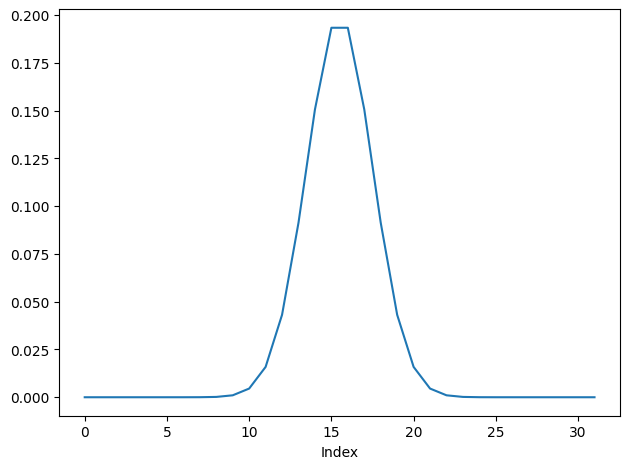

In [6]:
import scipy.signal.windows

gaussian = scipy.signal.windows.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

Быстрое преобразование Фурье для Гауссовой кривой

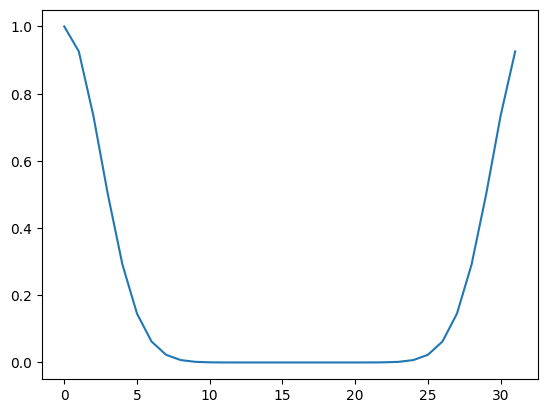

In [9]:
fft_g = np.fft.fft(gaussian)
plt.plot(abs(fft_g))

Давайте произведем свертку отрицательных частот влево.

Результат будет приблизительно похож на гауссову кривую

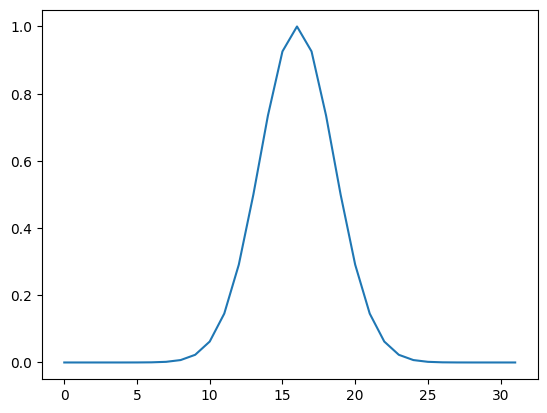

In [10]:
N = len(gaussian)
fft_rolled = np.roll(fft_g, N//2)
plt.plot(abs(fft_rolled))

Воспользуемся функцией `plot_gaussian` из chap08, которая строит гауссово окно и применяет БПФ справа

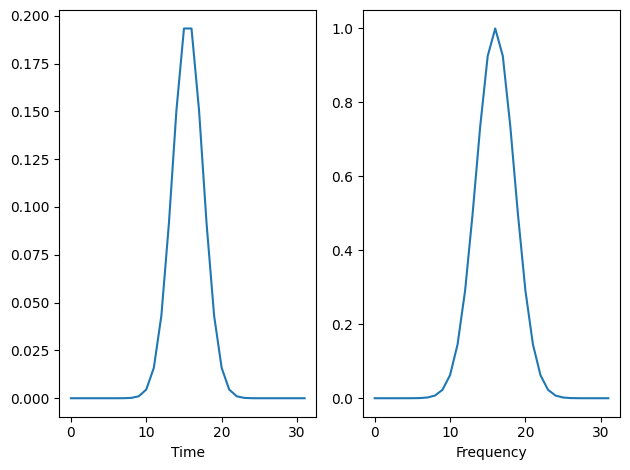

In [12]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

plot_gaussian(2)

In [15]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider)

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

<function __main__.plot_gaussian(std)>

При увеличении стандартного отклонения (std) Гауссова кривая становится шире, в то время как БПФ становится уже.

### Упражнение 2

Создадим сигнал с частотой 440 Гц и длительностью 1 секунда, используя примеры из главы:

In [16]:
from ThinkDSP.code.thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

Cоздадим несколько окон, используя кривую Гаусса в качестве значения по умолчанию, и построим их графики.

In [18]:
M = 15
std = 2.5

gaussian = scipy.signal.windows.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

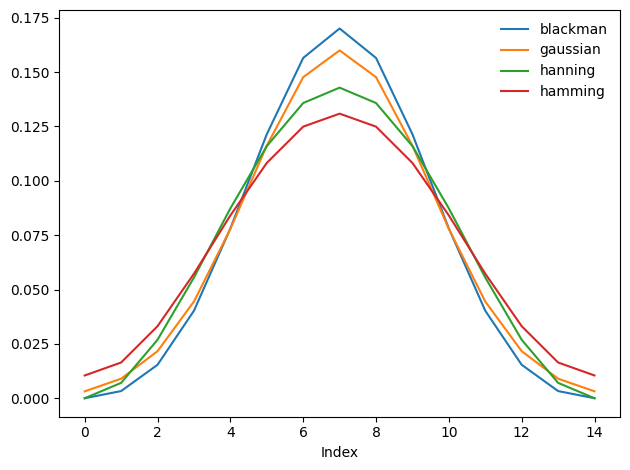

In [19]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

Формы оконных функций очень схожи. Теперь давайте построим графики дискретного преобразования Фурье (ДПФ) этих оконных функций, чтобы увидеть, как они влияют на спектр сигнала.

In [20]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

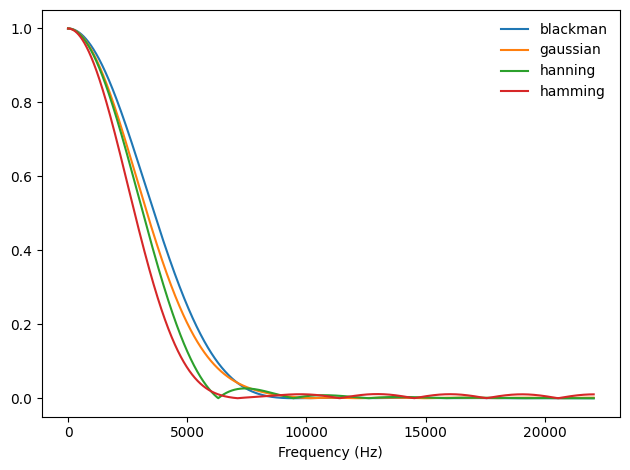

In [21]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

Кривая Хэмминга быстрее всех падает, в то время как кривая Блэкмана падает медленнее всего. При взгляде на график кривой Хэннинга можно увидеть, что у нее наиболее заметные боковые лепестки.